### First let's import the required libraries

In [2]:
import numpy as np # To be able to treat the data as vectors
import matplotlib.pyplot as plt #To visualize the data
%matplotlib inline
from sklearn.cluster import KMeans # To be able to apply k-Means clustering modeling
from sklearn.datasets.samples_generator import make_blobs #To generate a random dataset
import random 

### In this example, we're going to create our own random data by making use of make_blobs function
#### make_blobs function gets 3 different inputs to define the data.
#### n_samples: The total number of data points equally divided among the clusters.
#### centers: The number of centers to generate. Takes an array of [x,y] coordinates.
#### cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters.
####  

### One important thing worth mentioning here is that if we want our random data generator to generate
### the exact data each time the code is run, we should define the following function:

In [28]:
np.random.seed(0)

In [29]:
x, y = make_blobs(n_samples = 5000, centers = [[6,4], [-3,-2.5], [-1,0], [1,2], [3,4]], cluster_std=0.8)

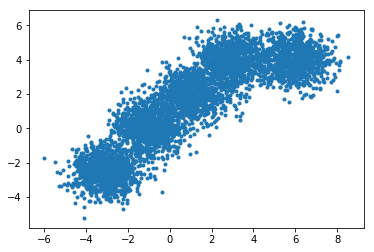

In [30]:
plt.scatter(x[:, 0], x[:, 1], marker='.') 

### Modeling

#### The k-Means Clustering class requires three inputs:
#### init: Initialization method of the model
#### n_clusters: # of clusters to be formed
#### n_init: # of times the k-Means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In [31]:
kMeans = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)

In [32]:
kMeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
kMeansLabels = kMeans.labels_
kMeansLabels.size

5000

In [34]:
kMeansClusterCenters = kMeans.cluster_centers_
print(kMeansClusterCenters)

[[ 5.99005944  3.98599216]
 [-0.99642102  0.01146353]
 [-3.06074315 -2.50978334]
 [ 2.95906315  4.00579838]
 [ 1.02461477  1.98135329]]


### Plotting

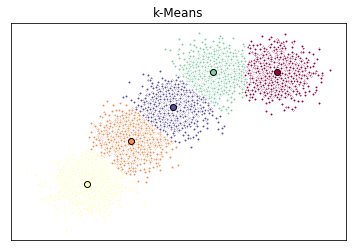

In [35]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kMeansLabels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[6,4], [-3,-2.5], [-1,0], [1,2], [3,4]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    myMembers = (kMeansLabels == k)
    
    # Define the centroid, or cluster center.
    clusterCenter = kMeansClusterCenters[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[myMembers, 0], x[myMembers, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(clusterCenter[0], clusterCenter[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('k-Means')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()